# Chirality Trends

- We would like to plot out the chirality trends of our TSI crystal refinements
- We do this with the Flack parameter, hinting at the handedness of each crystal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from matplotlib import cm
import math
import sys
import time
from scipy.optimize import least_squares
import glob
import scipy.fft
import os
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
#os.chdir('C:/Users/Jacob/OneDrive/yell/')
import h5py
import matplotlib

- This plot to be used in the paper

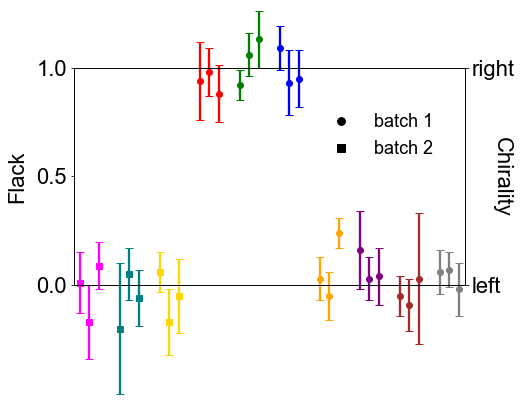

In [10]:
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (7,4)
#plt.tight_layout()

x7 = np.array([1,2.7,4.4])*0.5
x8 = 3.5+np.array([1,2.7,4.4])*0.5
x9 = 7+np.array([1,2.7,4.4])*0.5
x = 10.5+np.array([1,2.7,4.4])*0.5
x1 = 14+np.array([1,2.7,4.4])*0.5
x2 = 17.5+np.array([1,2.7,4.4])*0.5
x3 = 21+np.array([1,2.7,4.4])*0.5
x4 = 24.5+np.array([1,2.7,4.4])*0.5
x5 = 28+np.array([1,2.7,4.4])*0.5
x6 = 31.5+np.array([1,2.7,4.4])*0.5

y = np.array([1-0.06,1-0.02,1-0.12])
y1 = np.array([1-0.08,1-(-0.06),1-(-0.13)])
y2 = np.array([1-(-0.09),1-0.07,1-0.05])
y3 = np.array([0.03,(-0.05),0.24])
y4 = np.array([0.16,0.03,0.04])
y5 = np.array([(-0.05),(-0.09),0.03])
y6 = np.array([0.06,0.07,(-0.02)])
y7 = np.array([0.01,(-0.17),0.09])
y8 = np.array([(-0.2),0.05,(-0.06)])
y9 = np.array([0.06,(-0.17),(-0.05)])

e = np.array([0.18,0.11,0.13])
e1 = np.array([0.07,0.10,0.13])
e2 = np.array([0.10,0.15,0.13])
e3 = np.array([0.10,0.11,0.07])
e4 = np.array([0.18,0.10,0.13])
e5 = np.array([0.09,0.12,0.30])
e6 = np.array([0.10,0.08,0.12])
e7 = np.array([0.14,0.17,0.11])
e8 = np.array([0.3,0.12,0.13])
e9 = np.array([0.09,0.15,0.17])

xlist = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])*0.5
#y = [0.06,0.02,0.12,0.08,-0.06,-0.13,-0.09,0.07,0.05,1-0.03,1-(-0.05),1-0.24,1-0.16,1-0.03,1-0.04,
#     1-(-0.05),1-(-0.09),1-0.03,1-0.06,1-0.07,1-(-0.02),1-0.01,1-(-0.17),1-0.09,1-(-0.2),1-0.05,
#     1-(-0.06),1-0.06,1-(-0.17),1-(-0.05)]
#e = [0.18,0.11,0.13,0.07,0.10,0.13,0.10,0.15,0.13,0.10,0.11,0.07,
#     0.18,0.10,0.13,0.09,0.12,0.30,0.10,0.08,0.12,0.14,0.17,0.11,0.3,0.12,0.13,0.09,0.15,0.17]
fig, ax = plt.subplots(1,1)
plot = ax.errorbar(x,y,yerr=e,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='red',label='batch 1')
plot1 = ax.errorbar(x1,y1,yerr=e1,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='green')
plot2 = ax.errorbar(x2,y2,yerr=e2,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='blue')
plot3 = ax.errorbar(x3,y3,yerr=e3,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='orange')
plot4 = ax.errorbar(x4,y4,yerr=e4,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='purple')
plot5 = ax.errorbar(x5,y5,yerr=e5,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='brown')
plot6 = ax.errorbar(x6,y6,yerr=e6,fmt='o',capsize=4, clip_on = False, ms=6,elinewidth=2.3,color='grey')
plot7 = ax.errorbar(x7,y7,yerr=e7,fmt='s',capsize=4, clip_on = False, ms=6.2,elinewidth=2.3,color='magenta')
plot8 = ax.errorbar(x8,y8,yerr=e8,fmt='s',capsize=4, clip_on = False, ms=6.2,elinewidth=2.3,color='teal',label='batch 2')
plot9 = ax.errorbar(x9,y9,yerr=e9,fmt='s',capsize=4, clip_on = False, ms=6.2,elinewidth=2.3,color='gold')

#for b in plot[1]:
#    b.set_clip_on(False)
#for b in plot[2]:
#    b.set_clip_on(False)    
        
ax.get_xaxis().set_visible(False)
ax.set_ylim(0,1)
ax.set_yticks([0,0.5,1])
ax.set_yticklabels([0.0,0.5,1.0])
ax.set_ylabel('Flack')
ax.yaxis.set_label_coords(-0.12, .5)
#ax.set_aspect(2)

ax.set_xlim(0,max(x6)+0.5)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc=(0.62,0.55),numpoints=1,frameon=False,markerscale=1.3,fontsize=18)

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

ax1 = ax.twinx()
ax1.set_ylim(0,1)
ax1.set_yticks([0,1])
ax1.set_yticklabels(['left','right'])
ax1.set_ylabel('Chirality' ,rotation=270)
ax1.yaxis.set_label_coords(1.12, 0.5)
#ax1.set_aspect(2)

plt.savefig('C:/Users/Jacob/Downloads/Ta2Se8I_handedness.png',dpi=170,bbox_inches = 'tight', pad_inches = .018)

- Below is an earlier version of plot, not used

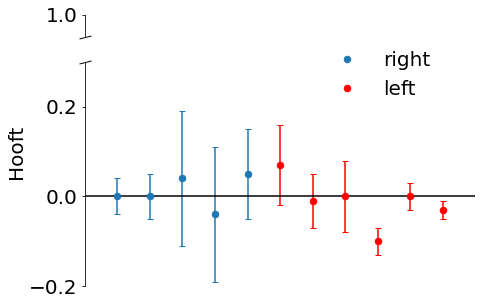

In [156]:
from matplotlib.gridspec import GridSpec

plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7,5)

fig = plt.figure()
gs = GridSpec(2, 2, height_ratios=[1, 10])
ax = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax1 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))

#fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

x = [1,2,3,4,5]
y = [0,0,0.04,-0.04,0.05]
e = [0.04,0.05,0.15,0.15,0.10]
x1 = [6,7,8,9,10,11]
y1 = [0.07,-0.01,0,-0.1,0,-0.03]
e1 = [0.09,0.06,0.08,0.03,0.03,0.02]
#ax.errorbar(x,y,yerr=e,fmt='o',capsize=3, clip_on = False, ms=6.5)
#ax.errorbar(x1,y1,yerr=e1,fmt='o',capsize=3, clip_on = False, ms=6.5, ecolor='r', mfc='r',mec='r')
ax1.errorbar(x,y,yerr=e,fmt='o',capsize=3, clip_on = False, ms=6.5,label='right')
ax1.errorbar(x1,y1,yerr=e1,fmt='o',capsize=3, clip_on = False, ms=6.5, ecolor='r', mfc='r',mec='r',label='left')
ax1.plot([0,14],[0,0],color='black')


ax.set_ylim(9.9,1.0)  # outliers only
ax1.set_ylim(-0.2, 0.3)  # most of the data
ax1.set_xlim(0, 12)  

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.xaxis.tick_bottom()
ax.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

ax1.set_ylabel('Hooft')
ax1.yaxis.set_label_coords(-0.15, .6)
ax1.set_yticks([-0.2,0,0.2])
#ax1.set_yticklabels([1.0])

ax.set_yticks([1.0])
ax.set_yticklabels([1.0])

d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0], [0], transform=ax.transAxes, **kwargs)
ax1.plot([0], [1], transform=ax1.transAxes, **kwargs)

# get handles
handles, labels = ax1.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc=[0.6,0.8],numpoints=1,frameon=False)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

#plt.show()

plt.savefig('C:/Users/Jacob/Downloads/Ta2Se8I_handedness.png',dpi=300,bbox_inches = 'tight', pad_inches = .018)